# Reading data and loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/weather-data/Project 1 - Weather Dataset.csv')

In [2]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [3]:
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [4]:
df.tail(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


* So in this dataset, we don't have any seasonal cycle.(One year and only four season)

In [5]:
df.shape

(8784, 8)

# handling uncommon data

* We only have one categorical column, and that is weather.
* In most classification problems, the target is weather. That's what we are gonna do. 
  

In [6]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['hour'] = df['Date/Time'].dt.hour
df['month'] = df['Date/Time'].dt.month
df['day'] = df['Date/Time'].dt.day
df['dayofweek'] = df['Date/Time'].dt.dayofweek  # 0=Monday


I made this to check the correlation, and if it was important, I would try to use it in my model. Of course, in this kind of dataset, season is the most crucial item. But we need to be sure about data leakage. 

In [7]:
unique_weather = df['Weather'].unique()
print(unique_weather)

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


# Multi-Label Binarization 

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
df['Weather_multi'] = df['Weather'].str.split(',') 
mlb = MultiLabelBinarizer()
multi_weather = pd.DataFrame(mlb.fit_transform(df['Weather_multi']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, multi_weather], axis=1)


In [9]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,hour,month,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1,...,0,0,0,0,0,0,0,0,0,0


* If you just use simple one-hot-encoding, you get a lot of columns which can increase the risk of overfitting 

# prepare data

In [10]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'hour',
       'month', 'day', 'dayofweek', 'Weather_multi', 'Blowing Snow', 'Clear',
       'Cloudy', 'Drizzle', 'Fog', 'Freezing Drizzle', 'Freezing Fog',
       'Freezing Rain', 'Haze', 'Heavy Rain Showers', 'Ice Pellets',
       'Mainly Clear', 'Moderate Rain', 'Moderate Rain Showers',
       'Moderate Snow', 'Mostly Cloudy', 'Rain', 'Rain Showers', 'Snow',
       'Snow Grains', 'Snow Pellets', 'Snow Showers', 'Thunderstorms'],
      dtype='object')

In [11]:
#I delete 'Dew Point Temp_C' because of data leakage
feature_cols = [
     'Rel Hum_%', 'Wind Speed_km/h', 
    'Visibility_km', 'Press_kPa', 
    'hour', 'month', 'day', 
    # Add the weather one-hot columns from your mlb
] + list(mlb.classes_)

X = df[feature_cols]
y = df['Temp_C']


# train - test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# RF

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf_reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R^2:", r2_score(y_test, y_pred))


MAE: 1.0141411496869661
MSE: 2.2027171701764376
RMSE: 1.4841553726535635
R^2: 0.9847903526154432


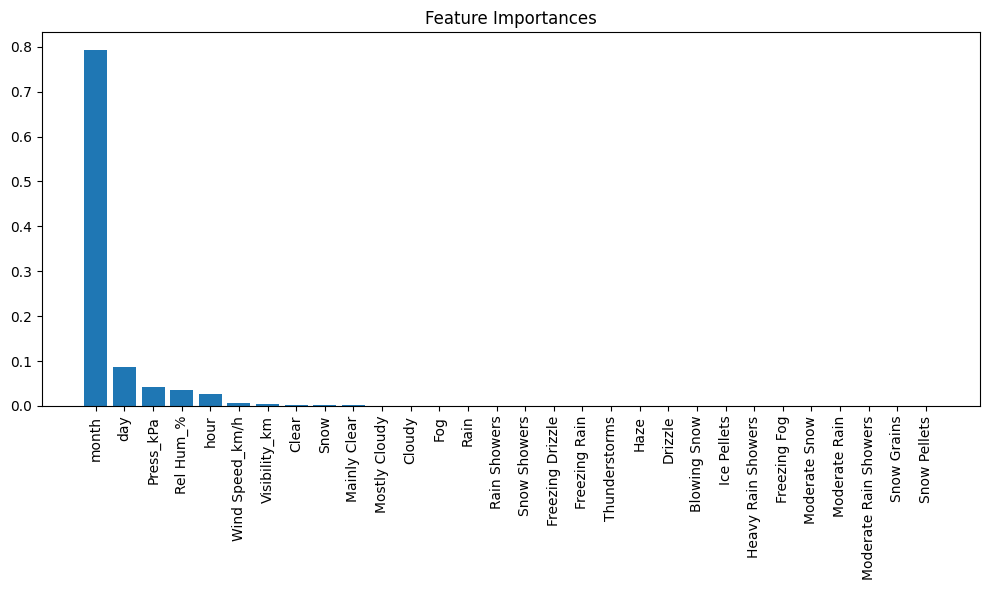

In [15]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feature_cols[i] for i in indices]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


* as we expected, month and time are the most crucial things in our dataset